In [22]:
import datetime
import numpy as np
import pandas as pd
import os
import sys
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

This notebook replicates some results of _Lifecycle Investing_'s excel simulations, found on their website.

In [23]:
# replicate the birthday rule backtest
import lc_investing.birthday_rule
lc_investing.birthday_rule = reload(lc_investing.birthday_rule)

s1 = lc_investing.birthday_rule.Simulation(data_folder='../lc_investing/data/')
s1.retirement_savings_before_period.head(2)
s1.retirement_savings_before_period.Final.describe()

count    9.600000e+01
mean     6.465746e+05
std      1.686988e+05
min      2.903095e+05
25%      5.393432e+05
50%      6.415549e+05
75%      7.790439e+05
max      1.026903e+06
Name: Final, dtype: float64

In [24]:
# replicate the constant percent stock backtest
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

s2 = lc_investing.constant_percent_stock.Simulation(data_folder='../lc_investing/data/')
s2.retirement_savings_before_period.Final.describe()

count    9.600000e+01
mean     7.488387e+05
std      2.498310e+05
min      3.087257e+05
25%      5.610321e+05
50%      6.914265e+05
75%      9.220282e+05
max      1.252684e+06
Name: Final, dtype: float64

In [25]:
# replicate the lifecycle strategy backtest
import lc_investing.lifecycle_strategy
lc_investing.lifecycle_strategy = reload(lc_investing.lifecycle_strategy)

s3 = lc_investing.lifecycle_strategy.Simulation(data_folder='../lc_investing/data/')
s3.calc_retirement_savings_before_period()
s3.retirement_savings_before_period.FINAL.describe()

count    9.600000e+01
mean     1.223105e+06
std      4.533787e+05
min      3.871724e+05
25%      8.841381e+05
50%      1.146812e+06
75%      1.522653e+06
max      2.177424e+06
Name: FINAL, dtype: float64

In [26]:
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

s2 = lc_investing.constant_percent_stock.Simulation(data_folder='..\\lc_investing\\data\\',
                                                    #bondadj=0,
                                                    #margadj=0,
                                                    #stockadj=0,
                                                    #lambdacons=1, # stock allocation
                                                    #start_age=23,
                                                    #start_amt=1,
                                                    #max_rate = np.Inf,
                                                    #borrowing_rate_override=None
                                                   )
df1 = s2.retirement_savings_before_period.Final.describe()  #describe([i/10 for i in range(0,10)]).to_frame().reset_index()

In [20]:
df1

count    9.600000e+01
mean     7.488387e+05
std      2.498310e+05
min      3.087257e+05
25%      5.610321e+05
50%      6.914265e+05
75%      9.220282e+05
max      1.252684e+06
Name: Final, dtype: float64

In [21]:
s2.retirement_savings_before_period.head()

period_num,cohort_num,begins_work,retire,1,2,3,4,5,6,7,...,520,521,522,523,524,525,526,527,528,Final
0,1,1871,1914,157.453664,310.715737,472.564225,671.488074,868.443407,1040.645778,1184.462977,...,701555.479900,699993.771028,701102.368392,668513.073727,658596.696689,661679.166826,671330.269615,667801.421737,655667.284896,667170.852995
1,2,1872,1915,157.453664,316.850485,481.374535,641.926506,803.451574,965.978738,1140.851732,...,672281.667170,656843.967498,665132.952378,666216.463360,690483.585412,712776.286420,738179.727984,752987.490997,757698.475599,743973.351851
2,3,1873,1916,157.453664,311.344008,468.545897,623.522816,803.311689,983.886260,1145.423233,...,667811.550523,675605.508847,676818.743873,672527.351810,673375.787184,684746.916072,691616.713170,693950.918117,670633.019095,655843.343946
3,4,1874,1917,157.453664,323.991447,479.385959,637.812304,789.648542,971.374661,1125.007229,...,551262.443182,531030.851372,533498.939958,533747.788787,516940.969400,490569.038166,466600.098878,440655.523994,425997.548051,438772.085928
4,5,1875,1918,157.453664,316.265624,480.954975,643.463698,801.805541,967.726565,1132.167843,...,408257.630612,412298.112097,410251.184018,404581.479232,402194.725488,395494.141920,402896.803885,405688.672925,397243.646302,390564.330259


,cohort_num,FINAL,emile
13,14,1006486.347,1.006486e+06
14,15,1362866.777,1.362867e+06


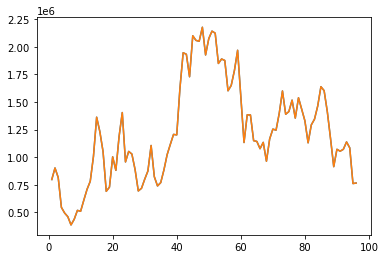

In [5]:
# lifecycle_retirement_savings_before_period, FINAL

df1 = pd.read_csv('../lc_investing/data/lifecycle_retirement_savings_before_period.csv')

df2 = df1.loc[:, ['cohort_num','FINAL']]
df2.loc[:, 'emile'] = s3.retirement_savings_before_period.FINAL

# df2 = df2.iloc[12:58, :]

plt.plot(df2.cohort_num, df2.FINAL)
plt.plot(df2.cohort_num, df2.emile)

df2.iloc[13:15]

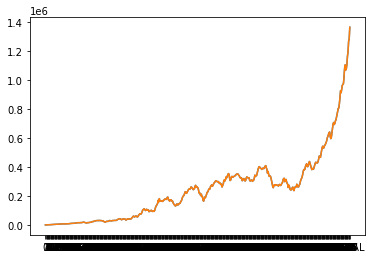

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,157.453664,157.453664
2,15,1885,1928,2,333.819247,333.819247
3,15,1885,1928,3,510.095955,510.095954
4,15,1885,1928,4,663.659038,663.659037


In [9]:
import matplotlib.pyplot as plt

# lifecycle_retirement_savings_before_period
df1 = pd.read_csv('../lc_investing/data/lifecycle_retirement_savings_before_period.csv')

cohort_num=15

df2 = pd.melt(df1.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df2.loc[:, 'emile'] = s3.retirement_savings_before_period.loc[s3.retirement_savings_before_period.cohort_num==cohort_num, 0:].values.flatten()

# df2 = df2.iloc[516:519,:]

# Plot a simple line chart
plt.plot(df2.period_num, df2.actual)

# Plot another line on the same chart/graph
plt.plot(df2.period_num, df2.emile)

plt.show()
df2.head()

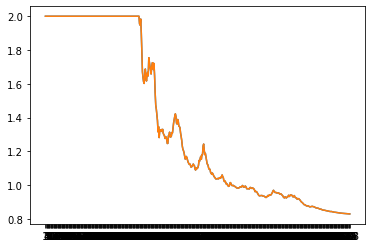

,cohort_num,begins_work,retire,period_num,actual,emile
1,15,1885,1928,1,2.0,2.0
2,15,1885,1928,2,2.0,2.0
3,15,1885,1928,3,2.0,2.0
4,15,1885,1928,4,2.0,2.0
5,15,1885,1928,5,2.0,2.0


In [10]:
import matplotlib.pyplot as plt

# percentage_target
df3 = pd.read_csv('../lc_investing/data/percentage_target.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s3.percentage_target.loc[s3.percentage_target.cohort_num==cohort_num, 0:].values.flatten()

df4 = df4.iloc[1:, :]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()

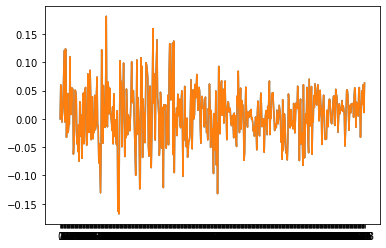

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,0.060056,0.060056
2,15,1885,1928,2,0.038315,0.038315
3,15,1885,1928,3,-0.005828,-0.005828
4,15,1885,1928,4,0.010240,0.010240


In [11]:
import matplotlib.pyplot as plt

# real_returns
df3 = pd.read_csv('../lc_investing/data/real_returns.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df3.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s3.real_returns.loc[s3.real_returns.cohort_num==cohort_num, 0:].values.flatten()

# df4 = df4.iloc[515:518,:]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()